# Summative assessment

This is your summative assignment for the Machine Learning introduction. You should solve it on your own, this is an individual assessment, not a group assessment!

All plots in this notebook need to have proper labels. 

We need to import these packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas

## Analysis

For this exercise we will use the data stored in the file `/data/data.csv`. We read it into a `pandas` dataframe here. It contains ten features and one label.

In [2]:
df = pandas.read_csv('/data/data.csv')

We can have a look at the first 10 entries:

In [3]:
df[:10]

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,label
0,-0.102910,-0.064668,-0.601561,0.458075,-0.302046,-0.068933,-0.120060,-0.419785,0.866534,-0.168409,2
1,0.680066,-0.903463,-0.979945,-1.519299,-1.884072,0.915458,1.367752,-0.938239,-1.400918,-0.669353,1
2,0.511258,-0.374994,-0.930681,-0.288804,-1.056845,1.473607,0.929226,-0.519077,-0.073774,-0.338057,1
3,1.792704,0.801943,-1.434807,0.116163,-0.227236,1.500648,0.746823,-1.155379,0.063000,0.838217,1
4,0.405948,1.803086,-0.430060,-0.533563,-1.354931,0.877724,0.503126,-0.890932,0.083709,-0.228317,2
5,-2.110800,0.168255,-0.074799,-1.483257,0.267183,0.229919,-0.209258,-0.635165,0.875140,-0.164143,2
6,0.246346,0.905210,-0.553979,0.313258,-0.891280,1.338232,0.195018,-0.870039,0.749878,0.114522,2
7,-0.999192,-0.190239,-0.393453,-0.663999,0.285192,-0.104935,-0.131600,-0.487071,0.274686,0.105375,2
8,0.426078,0.604158,-1.134840,-0.411602,-1.083683,1.016501,0.422004,-1.503052,1.516720,-0.401136,2
9,-0.486083,-0.475360,-1.279722,-0.610882,0.023573,0.319145,0.115408,-0.415397,0.153207,0.026887,2


**TASK 1:**

Standardize the inputs and prepare a training and test sample with ratio 2:1 using `train_test_split`. Use ` random_state=1234` to make your result easily comparable. We will train our models on the training set, and keep the test set to compare the models at the end of this notebook. [2 marks]


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# use random_state=1234 in train_test_split!
 
s_data = df.iloc[:,:-1]
print(s_data)
   
scaler = StandardScaler()
new = scaler.fit_transform(s_data)

y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(new,
                                y, test_size=0.333,random_state=1234)
print("\nChecking theres twice as many training examples than testing")
print("Train size = ",len(X_train))
print("Test size = ",len(X_test))

      Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0     -0.102910  -0.064668  -0.601561   0.458075  -0.302046  -0.068933   
1      0.680066  -0.903463  -0.979945  -1.519299  -1.884072   0.915458   
2      0.511258  -0.374994  -0.930681  -0.288804  -1.056845   1.473607   
3      1.792704   0.801943  -1.434807   0.116163  -0.227236   1.500648   
4      0.405948   1.803086  -0.430060  -0.533563  -1.354931   0.877724   
...         ...        ...        ...        ...        ...        ...   
1995  -1.873108  -0.951100  -0.135836  -2.459507  -1.276128   0.236806   
1996  -0.925832  -1.109169  -1.279218  -1.771311  -0.156447   1.769995   
1997   0.335527   1.599227  -1.392106   0.198717  -1.911447   1.725042   
1998   0.582786  -0.898263   0.493659   0.111483   0.471186  -1.038166   
1999  -0.087254  -0.582851   0.010704  -0.306393  -0.037254  -0.629703   

      Feature 7  Feature 8  Feature 9  Feature 10  
0     -0.120060  -0.419785   0.866534   -0.168409  
1      

**TASK 2: **

Use PCA to reduce the dimensionality of the input to a maximum of 5 dimensions. Plot the explained variance ratio as a function of the number of reduced dimensions (i.e. eigenvectors). [4 marks]


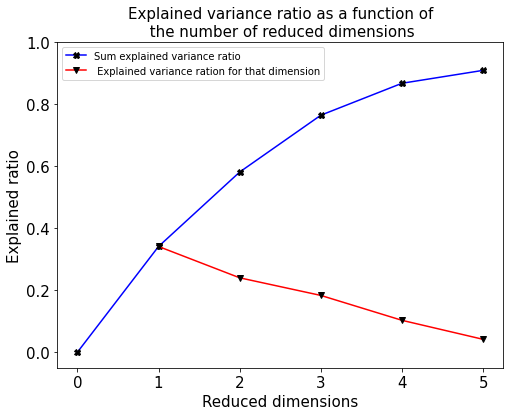

Ratios =  [0, 0.3405462218871936, 0.5802297696874538, 0.7632138703923954, 0.8660135615332255, 0.9075934735889308]


[0,
 0.3405462218871936,
 0.5802297696874538,
 0.7632138703923954,
 0.8660135615332255,
 0.9075934735889308]

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# YOUR CODE HERE
from matplotlib.pyplot import figure

def calculate_fractions(X):
    # YOUR CODE HERE
    fractions = []
    dim = []
    sim = []
    t = 4
    for i in [0,1,2,3,4,5]:
        
        pca = PCA(n_components=i)
        pca.fit_transform(X)
        
        fraction = pca.explained_variance_ratio_
        fractions.append(sum(fraction))
    
        if i == 5:
            sim = fraction
            
    
        dim.append(i)
        t = t-1

    figure(figsize=(8, 6))
    plt.plot(dim,fractions, color = 'blue', marker = "X", markerfacecolor = "black", markeredgecolor = "black", label = 'Sum explained variance ratio')
    plt.plot(dim[1:6],sim, color = 'red', marker = "v", markerfacecolor = "black", markeredgecolor = "black", label = ' Explained variance ration for that dimension')
    plt.ylabel('Explained ratio', fontsize=15)
    plt.xlabel('Reduced dimensions', fontsize=15)
    plt.title("Explained variance ratio as a function of\n the number of reduced dimensions", fontsize=15)
    plt.ylim(-.05,1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
    plt.show()
    print("Ratios = ",fractions)
    return(fractions)


###################### check wich data set to do ###################################
calculate_fractions(X_train)


**TASK 3:**

Use the components along the two largest eigenvectors of your PCA decomposition to plot the dataset in two dimensions using different colors for each class. [4 marks]



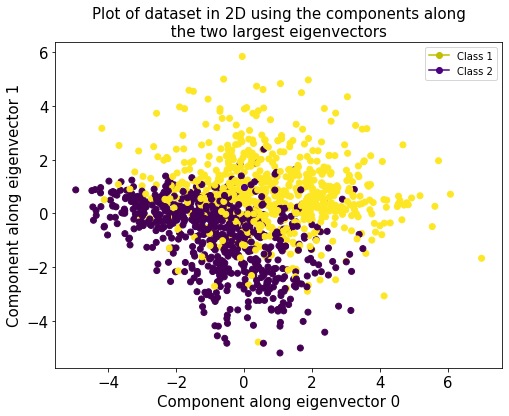

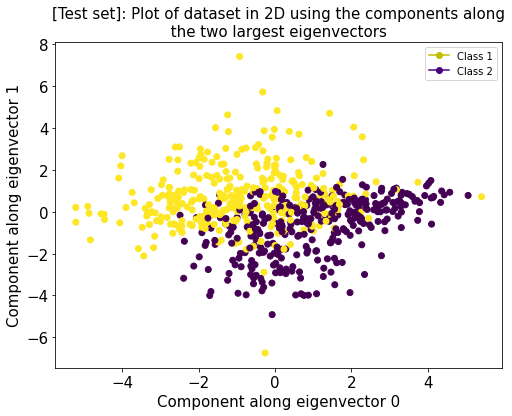

########################################################################################################
#From these plots you can see the training set may not be a good representation of the whole data set  #
#as the test set looks 'significantly' different interms of the two cleasses.
########################################################################################################


In [6]:
# YOUR CODE HERE

###################### check wich data set to do ###################################
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


figure(figsize=(8, 6))


plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c = y_train)


plt.ylabel('Component along eigenvector 1', fontsize=15)
plt.xlabel('Component along eigenvector 0', fontsize=15)
plt.title("Plot of dataset in 2D using the components along\n the two largest eigenvectors ", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
line, = plt.plot([1], color = "y", marker = 'o', linestyle = None, label = 'Class 1')
line, = plt.plot([1], color = "indigo", marker = 'o', linestyle = None, label = 'Class 2')
plt.legend()
plt.show()


pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)


figure(figsize=(8, 6))


plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c = y_test)


plt.ylabel('Component along eigenvector 1', fontsize=15)
plt.xlabel('Component along eigenvector 0', fontsize=15)
plt.title("[Test set]: Plot of dataset in 2D using the components along\n the two largest eigenvectors ", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
line, = plt.plot([1], color = "y", marker = 'o', linestyle = None, label = 'Class 1')
line, = plt.plot([1], color = "indigo", marker = 'o', linestyle = None, label = 'Class 2')
plt.legend()
plt.show()

print("########################################################################################################")
print("#From these plots you can see the training set may not be a good representation of the whole data set  #\n#as the test set looks 'significantly' different interms of the two cleasses.")
print("########################################################################################################")

## Logistic regression

**TASK 4:**

Use a logistic regression model to classify the data after PCA. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score using 5-fold cross validation. Plot a curve for a model trained on the input data reduced to 1, 2, 5 and 10 dimensions by PCA. You might want to use `fill_between` for the uncertainties. Your plot should have appropriate labels. [7 marks]


Best Reg parameter =  LogisticRegression(C=0.0016831803533309583)


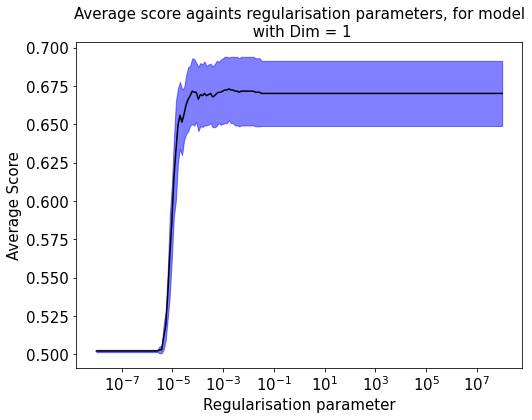

Best Reg parameter =  LogisticRegression(C=0.00352970730273065)


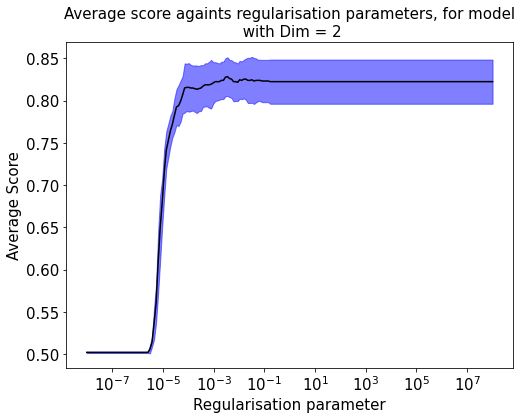

Best Reg parameter =  LogisticRegression(C=0.01552225357427048)


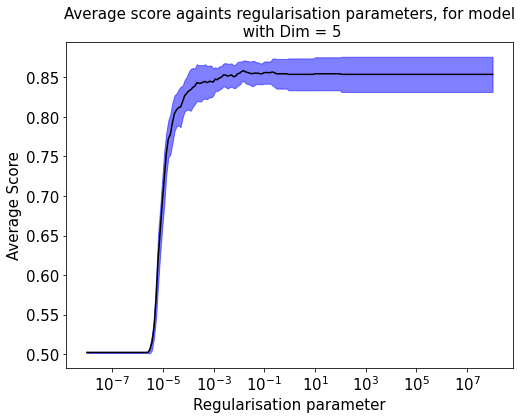

Best Reg parameter =  LogisticRegression(C=0.7575250258771921)


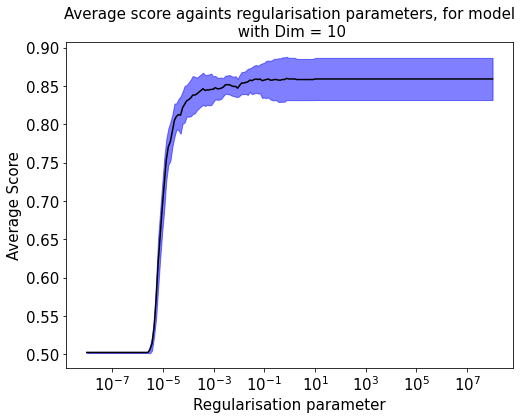

Train score =  [0.6701649175412294, 0.8238380809595203, 0.8583208395802099, 0.863568215892054]
Test score =  [0.7042042042042042, 0.8348348348348348, 0.8633633633633634, 0.8723723723723724]


In [13]:
from sklearn.model_selection import GridSearchCV

# YOUR CODE HERE

#For other tasks
Best_params = []

#for task 6 specifically
train_score = []
train_var = []
#Note test doesnt have variance as there isnt multiple sub samples in which we test.
test_score = []

for i in [1,2,5,10]:
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)

    lr = LogisticRegression()

    C_val = np.logspace(-8,8,200)
    parameters = {'C': C_val}

    Rsearch = GridSearchCV(lr, parameters, cv=5) 
    Rsearch.fit(X_train_pca,y_train)

    
    Best_params.append(Rsearch.best_estimator_)
    print("Best Reg parameter = ", Rsearch.best_estimator_)
    
    scores = Rsearch.cv_results_['mean_test_score']
    scores_std = Rsearch.cv_results_['std_test_score']
    
     ############################################################
    #        Finding params for task 6 (using train set)        #
    
    #   score of the best esitmator
    train_score.append(Rsearch.best_estimator_.score(X_train_pca,y_train))
    
    #finds the variance assosiated with the best score 
    #I.E finds the correct index
    bestt = Rsearch.best_estimator_.score(X_train_pca,y_train)
    array = np.asarray(scores)
    idx = (np.abs(array - bestt)).argmin()
    train_var.append(scores_std[idx])
    ############################################################
    
    figure(figsize=(8, 6))
    plt.fill_between(C_val, scores-scores_std, scores+scores_std, alpha = 0.5, color = 'b')

    plt.plot(C_val, scores, 'black')
    plt.ylabel('Average Score', fontsize=15)
    plt.xlabel('Regularisation parameter', fontsize=15)
    plt.xscale('log')
    plt.title("Average score againts regularisation parameters, for model\n with Dim = "+ str(i), fontsize=15)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()    
    
    
    
    ############################################################
    #        Finding params for task 6 (using test set)        #
    ############################################################
    

    X_test_pca = pca.transform(X_test)

    
    test_score.append(Rsearch.best_estimator_.score(X_test_pca,y_test))
    
print("Train score = ", train_score)
print("Test score = ", test_score)

**TASK 5:**

For each of the dimensionalities 1,2,5 and 10, use the best value for the regularisation parameter to plot the learning curve (i.e. the score as a function of the number of training samples). Use 5-fold cross validation to show the training score and a validation score with uncertainties estimates. You may want to use `sklearn`'s `learning_curve`. [7 marks]



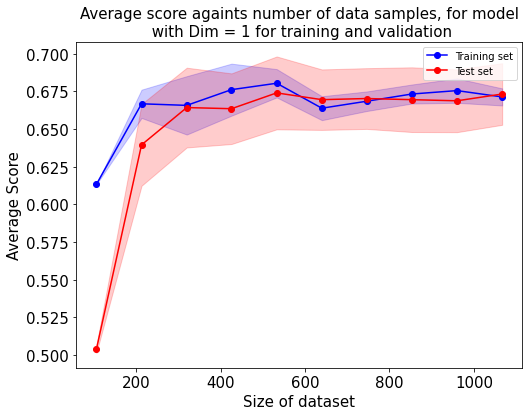

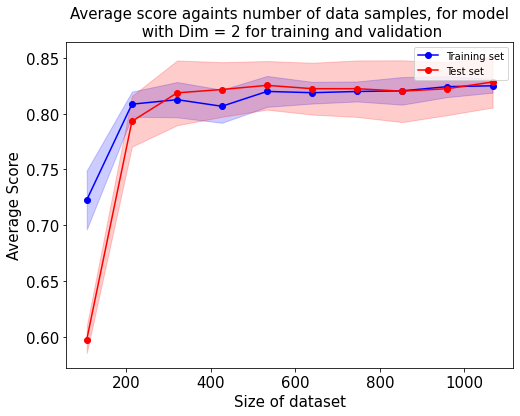

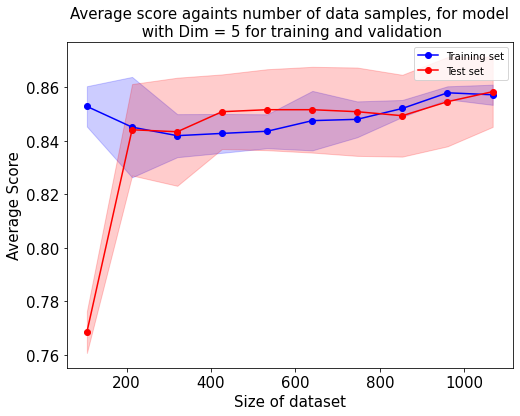

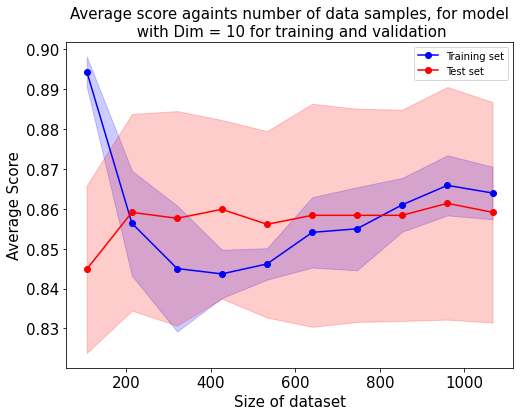

In [14]:
from sklearn.model_selection import learning_curve

t=0

for i in [1,2,5,10]:
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    

    lr = LogisticRegression()

    train_sizes=np.linspace(.1, 1, 10)
    
    #Note Best_params was found in task 4
    train_sizes, train_scores, test_scores = learning_curve(Best_params[t] , X_train_pca, 
                                                    y_train, train_sizes=train_sizes, cv=5)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    figure(figsize=(8, 6))
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.2, color = 'b')
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.2, color = 'r')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'b', label = 'Training set')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'r', label = 'Test set')
    plt.legend()
    t += 1

    

    plt.ylabel('Average Score', fontsize=15)
    plt.xlabel('Size of dataset', fontsize=15)
    plt.title("Average score againts number of data samples, for model\n with Dim = "+ str(i)+" for training and validation", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.show() 


**TASK 6:**

Collect in one plot the expected scores and their uncertainties for the four models that you trained so far. Show on the same plot the scores of the same models on the test set we set aside at the beginning of the notebook. [6 marks]




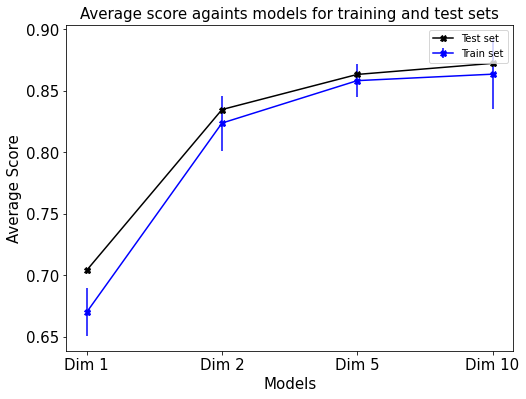

In [15]:
# YOUR CODE HERE
##########################################################
##########################################################
##########################################################

#Note all the calculations I plot in this were done in task 4 
# I commented the code used for this cell in task 4 to make it clearer.


##########################################################
##########################################################
##########################################################


x = [1,2,3,4]
figure(figsize=(8, 6))
plt.errorbar(x, train_score, yerr=train_var, color = 'b', label = 'Train set', marker = 'X')
plt.plot(x, test_score, color = 'black', label = 'Test set', marker = 'X')

plt.ylabel('Average Score', fontsize=15)
plt.xlabel('Models', fontsize=15)
plt.legend()
plt.title("Average score againts models for training and test sets", fontsize=15)
my_ticks=('Dim 1', 'Dim 2', 'Dim 5', 'Dim 10')
plt.xticks(x, my_ticks,fontsize=15)

plt.yticks(fontsize=15)
plt.show() 



## k-neighbours

**TASK 7:**

Use a k-neighbours model to classify the data. Plot the scores as a function of the regularisation parameter and an estimate of the uncertainty on the score. [5 marks]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# YOUR CODE HERE

alpha = np.linspace(1,150,150, dtype=int) # Note i checked larger range, but from study I understand K is usually close to ~ sqrt(N)
parameters = {'n_neighbors': alpha}

Rsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
Rsearch.fit(X_train,y_train)      
    
Best_params = Rsearch.best_estimator_
    
print("Best Reg parameter = ", Best_params )

scores = Rsearch.cv_results_['mean_test_score']
scores_std = Rsearch.cv_results_['std_test_score']

    
    
figure(figsize=(8, 6))
plt.fill_between(alpha, scores-scores_std, scores+scores_std, alpha = 0.5, color = 'b')

plt.plot(alpha, scores, 'black')
plt.ylabel('Average Score', fontsize=15)
plt.xlabel('Regularisation parameter', fontsize=15)

plt.title("Average score againts regularisation parameter\n for KNN model", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()    
    


**TASK 8:**

Using the best value for the regularisation parameter plot the learning curves for training and validation set including uncertainty estimates using 5-fold cross validation. [5 marks]


In [ ]:
# YOUR CODE HERE
train_sizes=np.linspace(.1, 1, 10)
    
train_sizes, train_scores, test_scores = learning_curve(Best_params , X_train, y_train,
                                                    train_sizes=train_sizes, cv=5)
    
train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis=1)
    
figure(figsize=(8, 6))

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.2, color = 'b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.2, color = 'r')
    
plt.plot(train_sizes, train_scores_mean, 'o-', color = 'b', label = 'Training set')
plt.plot(train_sizes, test_scores_mean, 'o-', color = 'r', label = 'Validation set')
plt.legend()

plt.ylabel('Average Score', fontsize=15)
plt.xlabel('Size of dataset', fontsize=15)
plt.title("Average score againts number of data samples, for\n KNN model for training and validation", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 
